In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
# pd.set_option('display.float_format','{:.4f}'.format)

In [355]:
data = pd.read_csv('data/jordan_1(pre).csv')

In [356]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [357]:
print(data.shape)
data.head()

(325227, 14)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
3,270,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
4,260,349000,2021-06-09,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450


In [358]:
pd.pivot_table(data, index='product', values='price', aggfunc='mean')

,price
product,
(GS) Jordan 1 Low Armory Navy,201575
(GS) Jordan 1 Low Black Particle Grey,214442
(GS) Jordan 1 Low Black Very Berry,112979
(GS) Jordan 1 Low Bred Toe,151199
(GS) Jordan 1 Low Court Purple 2020,277979
...,...
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue,1605694
Jordan 1 x Trophy Room Retro High OG SP Chicago,3394463
Jordan 1 x Trophy Room Retro High OG SP Chicago (Friends & Family),4132846


In [359]:
data.groupby('product')['price'].mean()

product
(GS) Jordan 1 Low Armory Navy                                         201575
(GS) Jordan 1 Low Black Particle Grey                                 214442
(GS) Jordan 1 Low Black Very Berry                                    112979
(GS) Jordan 1 Low Bred Toe                                            151199
(GS) Jordan 1 Low Court Purple 2020                                   277979
                                                                       ...  
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue     1605694
Jordan 1 x Trophy Room Retro High OG SP Chicago                      3394463
Jordan 1 x Trophy Room Retro High OG SP Chicago (Friends & Family)   4132846
Jordan 1 x Union Retro High Black Toe                                2068143
Jordan 1 x Union Retro High Blue Toe                                 2086721
Name: price, Length: 359, dtype: float64

## EDA

In [360]:
df = data.copy()

### Missing Value

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325227 entries, 0 to 325226
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   size           325227 non-null  int64 
 1   price          325227 non-null  int64 
 2   date           325227 non-null  object
 3   product        325227 non-null  object
 4   release_date   325227 non-null  object
 5   color          325227 non-null  object
 6   release_price  325227 non-null  int64 
 7   type           325227 non-null  object
 8   brand          325227 non-null  object
 9   category       325227 non-null  object
 10  number         325227 non-null  int64 
 11  wish           325227 non-null  int64 
 12  review         325227 non-null  int64 
 13  transactions   325227 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 34.7+ MB


In [362]:
df = df[df['number'].notnull()]

In [363]:
df = df.reset_index(drop=True)

In [364]:
print(df.shape)
df.head()

(325227, 14)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
3,270,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450
4,260,349000,2021-06-09,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450


In [365]:
len(set(df['product']))

359

### type 생성

In [366]:
# df['product'].str.contains(' Low', regex=False).value_counts()

In [367]:
# df.loc[df['product'].str.contains(' Low', regex=False), 'type'] = 'Low'

In [368]:
# df.loc[df['product'].str.contains(' Low', regex=False) == False, 'product'].value_counts()

In [369]:
# df.loc[df['product'].str.contains('Dunk low', regex=False), 'type'] = 'Low'

In [370]:
# df.loc[df['type'] == 'Low'].value_

### transactions

In [371]:
# df = df[df['transactions'] > 50]

In [372]:
df['transactions'].value_counts()

1450    43500
2950    23600
5950    11900
5900    11800
5850    11700
        ...  
6           6
3           6
4           4
2           2
1           2
Name: transactions, Length: 265, dtype: int64

In [373]:
df[df['transactions'] == 1450]['product'].value_counts()

Jordan 1 x A Ma Maniere Retro High OG SP Sail and Burgundy    1450
(GS) Jordan 1 Retro High OG Black Mocha                       1450
(W) Jordan 1 Retro High Satin Red                             1450
Jordan 1 KO Storm Blue                                        1450
Jordan 1 Low Varsity Red                                      1450
(W) Jordan 1 Low Black Siren Red                              1450
(GS) Jordan 1 Retro High OG Shadow 2.0                        1450
Jordan 1 Mid Chicago 2020                                     1450
(GS) Jordan 1 Retro High OG Patent Bred                       1450
(W) Jordan 1 Zoom Air CMFT Light Bone                         1450
Jordan 1 Retro High OG Light Fusion Red                       1450
Jordan 1 Low SE Spades                                        1450
Jordan 1 Low Triple White Tumbled Leather 2020                1450
(GS) Jordan 1 Mid Light Smoke Grey                            1450
Jordan 1 Mid SE Track Red                                     

<AxesSubplot:xlabel='transactions', ylabel='Count'>

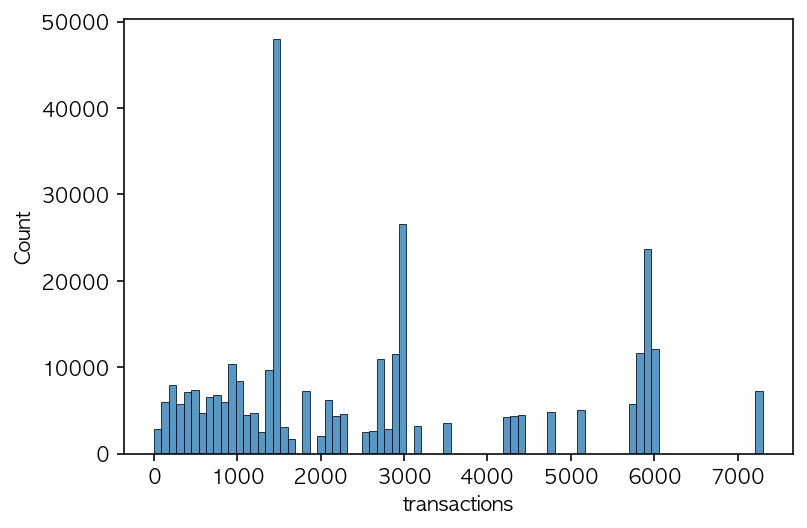

In [374]:
sns.histplot(df['transactions'])

<AxesSubplot:xlabel='transactions', ylabel='Count'>

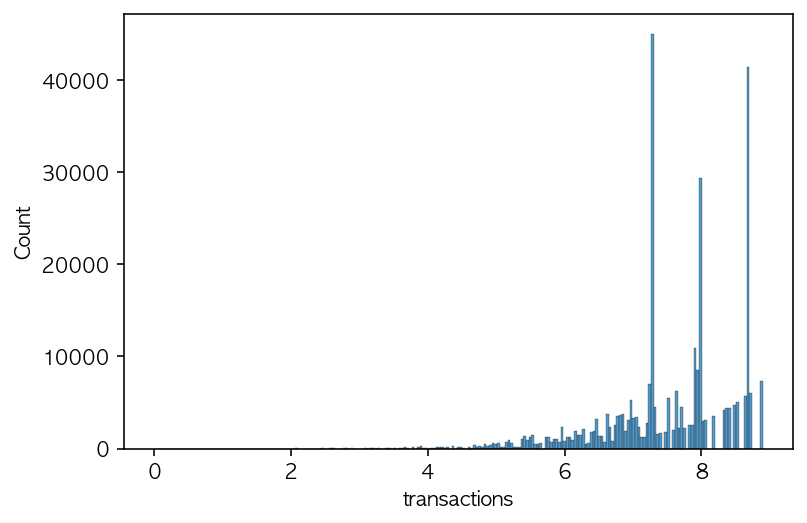

In [375]:
sns.histplot(np.log(df['transactions']))

### review

<AxesSubplot:xlabel='review', ylabel='Count'>

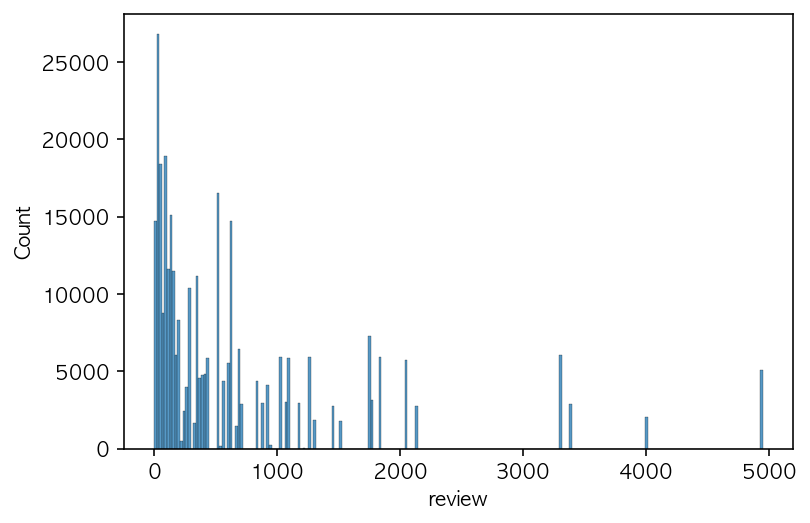

In [376]:
sns.histplot(df['review'])

<AxesSubplot:xlabel='review', ylabel='Count'>

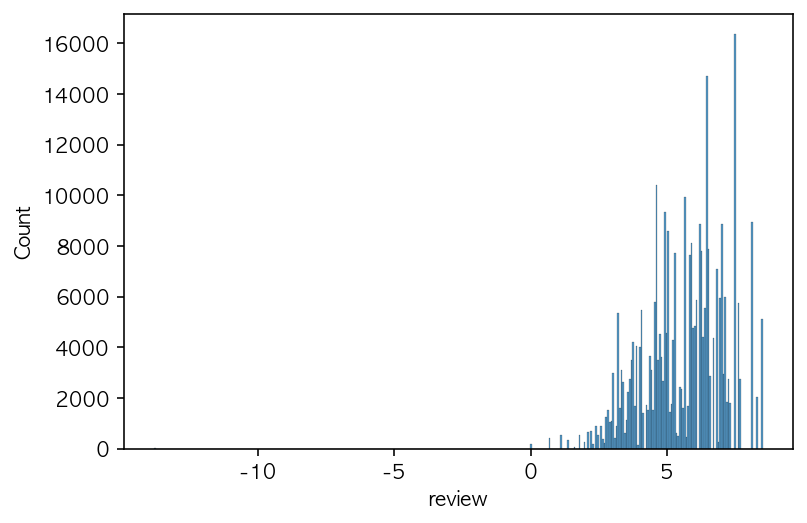

In [377]:
sns.histplot(np.log(df['review'] + 0.000001))

In [378]:
df['review_log'] = np.log(df['review'] + 0.000001)

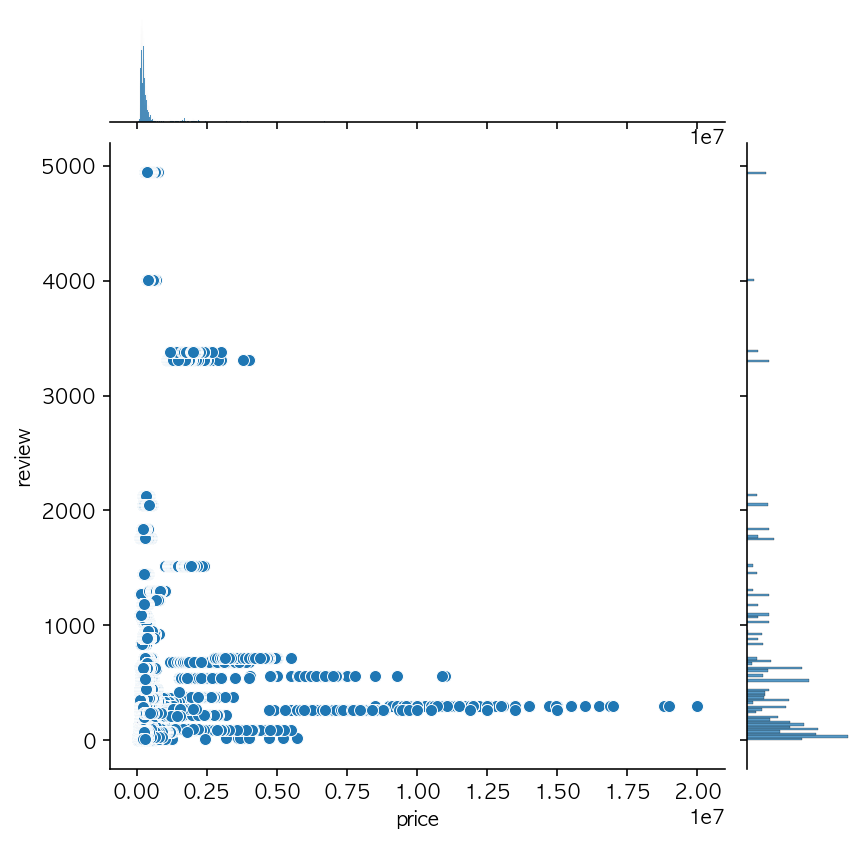

In [379]:
sns.jointplot( df['price'], df['review'])
plt.show()

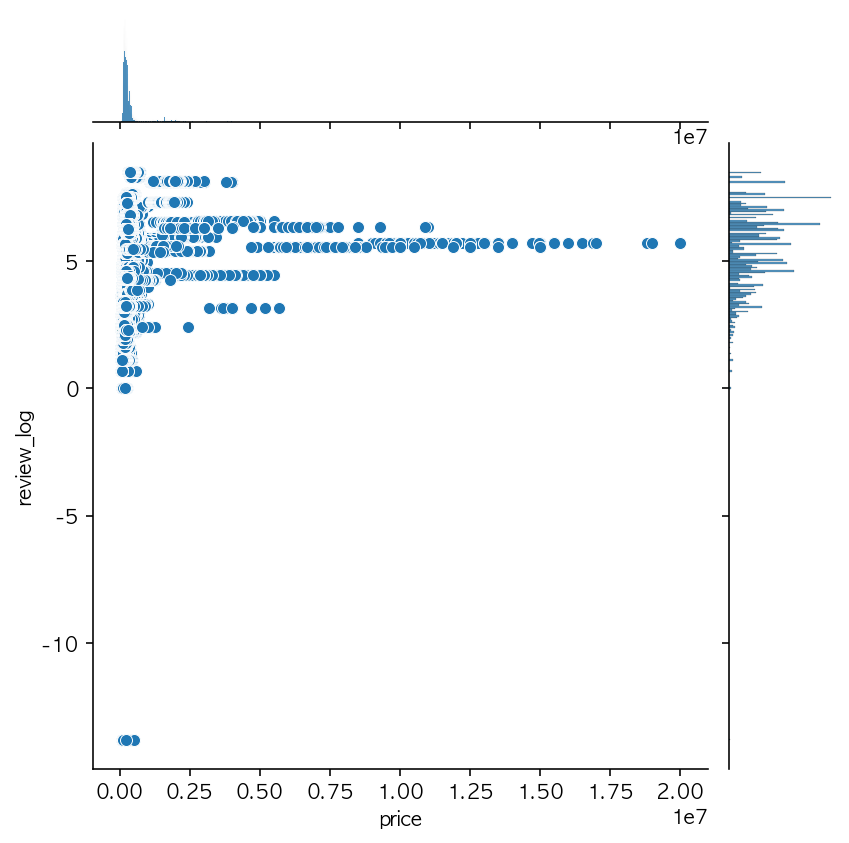

In [380]:
sns.jointplot( df['price'], df['review_log'])
plt.show()

In [381]:
df[['review_log', 'review']]

,review_log,review
0,6,443
1,6,443
2,6,443
3,6,443
4,6,443
...,...,...
325222,2,10
325223,2,10
325224,2,10
325225,2,10


In [382]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6


### wish

<AxesSubplot:xlabel='wish', ylabel='Count'>

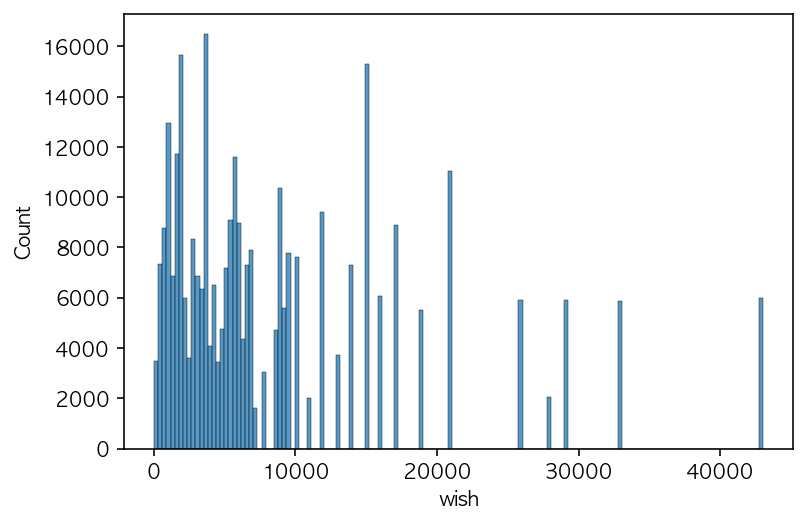

In [383]:
sns.histplot(df['wish'])

<AxesSubplot:xlabel='wish', ylabel='Count'>

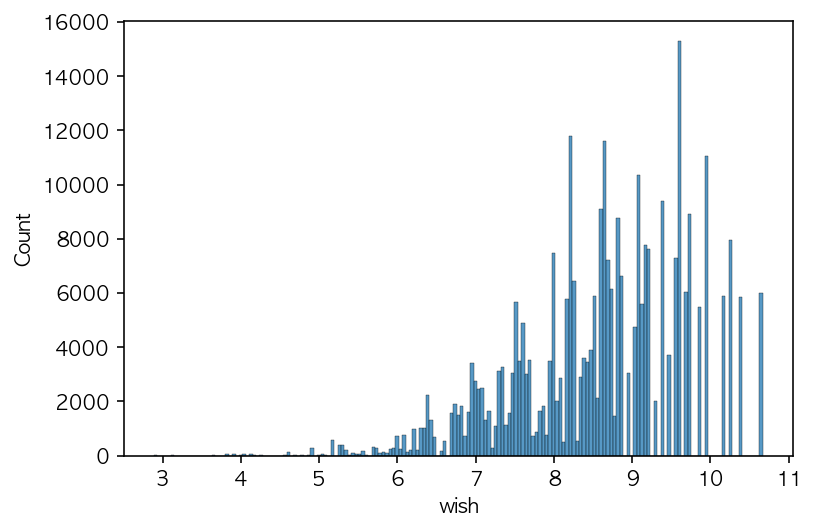

In [384]:
sns.histplot(np.log(df['wish'] + 0.000001))

In [385]:
df['wish_log'] = np.log(df['wish'] + 0.000001)

In [386]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8


### date
- min_date 추가
- max_date 추가

In [387]:
# min_max_date = pd.pivot_table(df, index='product', values='date', aggfunc=(min, max))

In [388]:
# min_max_date = pd.DataFrame({'product': min_max_date.index, 'start_date': min_max_date['min'], 'end_date': min_max_date['max']}).reset_index(drop=True)

In [389]:
# min_max_date

In [390]:
# df = pd.merge(df, min_max_date, how='left', on='product')

In [391]:
# df['start_date']

In [392]:
# df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]['product'].value_counts()

In [393]:
# df[df['product'] == 'Nike Dunk Low Triple White']

In [394]:
# df = df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]

In [395]:
# df.reset_index(drop=True, inplace=True)

### release_price

In [396]:
df['release_price'].value_counts().sort_index()

59000        255
69000         88
77700         53
79000        666
89600        577
93900        158
99000      13340
107600      4729
107700       975
109000      9102
113600       538
114800       328
115000       291
119000     41779
119500        79
119700       389
128300       249
129000      8164
131500      1573
136300        12
137500      1851
139000     85618
143500      1119
149400       116
150300       419
155400       471
159000     19576
167400        55
169000     12200
169400        30
174200        14
175600        49
177500       127
179000      4643
179300       393
189000     11288
189100       179
191300      5773
191600       666
192400      1450
199000     78155
201700        18
203300       492
209000      1729
209200      1250
215200        85
227200      1431
229000      5171
239000      6982
239100         8
263200       111
418500         5
2700000      240
3000000      168
Name: release_price, dtype: int64

In [397]:
print(df.shape)
df.head()

(325227, 16)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8
3,270,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8
4,260,349000,2021-06-09,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8


<AxesSubplot:xlabel='release_price', ylabel='Count'>

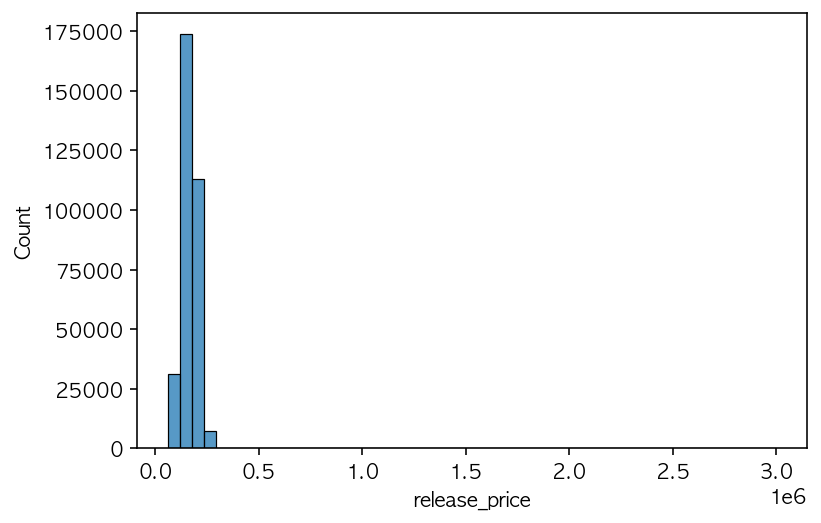

In [398]:
sns.histplot(df['release_price'], bins=50)

### size
- size_target 컬럼 생성
- size_type 컬럼 생성

In [399]:
# GS : grade school 초등학생 사이즈
# PS : Pre school 미취학 아동 사이즈
# TD : Toddler 유야용 사이즈
# W : Womans 여성 사이즈

In [400]:
set(df['product'])

{'(GS) Jordan 1 Low Armory Navy',
 '(GS) Jordan 1 Low Black Particle Grey',
 '(GS) Jordan 1 Low Black Very Berry',
 '(GS) Jordan 1 Low Bred Toe',
 '(GS) Jordan 1 Low Court Purple 2020',
 '(GS) Jordan 1 Low Dark Powder Blue',
 '(GS) Jordan 1 Low Game Royal',
 '(GS) Jordan 1 Low Green Glow Purple Shock',
 '(GS) Jordan 1 Low Green Toe',
 '(GS) Jordan 1 Low Gym Red Black',
 '(GS) Jordan 1 Low Light Arctic Pink',
 '(GS) Jordan 1 Low Light Smoke Grey',
 '(GS) Jordan 1 Low OG Starfish',
 '(GS) Jordan 1 Low Pollen',
 '(GS) Jordan 1 Low Rush Pink',
 '(GS) Jordan 1 Low SE ASW Black',
 '(GS) Jordan 1 Low SE Barcelona',
 '(GS) Jordan 1 Low SE Light Smoke Grey Gym Red',
 '(GS) Jordan 1 Low SE Pale Vanilla',
 '(GS) Jordan 1 Low Varsity Red',
 '(GS) Jordan 1 Low White Red Black',
 '(GS) Jordan 1 Mid Black Arctic Punch',
 '(GS) Jordan 1 Mid Black Chile Red',
 '(GS) Jordan 1 Mid Black Hyper Royal',
 '(GS) Jordan 1 Mid Bred Banned 2020',
 '(GS) Jordan 1 Mid Chicago Black Toe',
 '(GS) Jordan 1 Mid Dark T

In [401]:
df.loc[(df['product'].str.contains('(GS)',regex = False)) | (df['product'].str.contains('(W)',regex = False)), 'size_target'] = 'Female'
df.loc[(df['product'].str.contains('(PS)',regex = False)) | (df['product'].str.contains('(TD)',regex = False)), 'size_target'] = 'Kids'

In [402]:
df.loc[(df['size_target'] != 'Female') & (df['size_target'] != 'Kids'), 'size_target'] = 'Male'

In [403]:
df[['product', 'size_target']].value_counts()

product                                                           size_target
Jordan 1 Retro High OG Hyper Royal                                Male           7300
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue  Male           6050
(W) Jordan 1 Low White Wolf Grey                                  Female         6000
Jordan 1 Mid Gym Red Black White                                  Male           5950
Jordan 1 Low OG Starfish                                          Male           5950
                                                                                 ... 
(GS) Jordan 1 Mid SE Siempre Familia                              Female            3
(GS) Jordan 1 Mid SE USA Olympic                                  Female            3
(W) Jordan 1 Sage XX Off White                                    Female            2
(PS) Jordan 1 Mid University Gold                                 Kids              1
(W) Jordan 1 Acclimate Black                                  

In [404]:
df.loc[(df['product'].str.contains('(GS)',regex = False)), 'size_type'] = 'GS'
df.loc[(df['product'].str.contains('(W)',regex = False)), 'size_type'] = 'W'
df.loc[(df['product'].str.contains('(PS)',regex = False)), 'size_type'] = 'PS'
df.loc[(df['product'].str.contains('(TD)',regex = False)), 'size_type'] = 'TD'
df.loc[df['size_target'] == 'Male', 'size_type'] = 'M'

In [405]:
df[['product', 'size_type']].value_counts().head(20)

product                                                           size_type
Jordan 1 Retro High OG Hyper Royal                                M            7300
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue  M            6050
(W) Jordan 1 Low White Wolf Grey                                  W            6000
Jordan 1 Mid Gym Red Black White                                  M            5950
Jordan 1 Low OG Starfish                                          M            5950
(W) Jordan 1 Mid Grey Fog                                         W            5900
Jordan 1 Retro High OG Shadow 2.0                                 M            5900
(W) Jordan 1 Mid Wolf Grey                                        W            5850
Jordan 1 Mid Bred Banned 2020                                     M            5850
Jordan 1 Retro High OG CO.JP Midnight Navy                        M            5750
Jordan 1 Retro High OG Black Mocha                                M            5100


In [406]:
df[['size_target', 'size_type', 'product', 'size']]

,size_target,size_type,product,size
0,Male,M,Jordan 1 Retro High OG Light Fusion Red,300
1,Male,M,Jordan 1 Retro High OG Light Fusion Red,285
2,Male,M,Jordan 1 Retro High OG Light Fusion Red,280
3,Male,M,Jordan 1 Retro High OG Light Fusion Red,270
4,Male,M,Jordan 1 Retro High OG Light Fusion Red,260
...,...,...,...,...
325222,Female,W,(W) Jordan 1 Mid Anti Gravity Machines,235
325223,Female,W,(W) Jordan 1 Mid Anti Gravity Machines,235
325224,Female,W,(W) Jordan 1 Mid Anti Gravity Machines,280
325225,Female,W,(W) Jordan 1 Mid Anti Gravity Machines,250


In [407]:
df[df['size_target'].isnull()].value_counts()

Series([], dtype: int64)

In [408]:
df[df['size_type'].isnull()].value_counts()

Series([], dtype: int64)

<AxesSubplot:xlabel='size', ylabel='Count'>

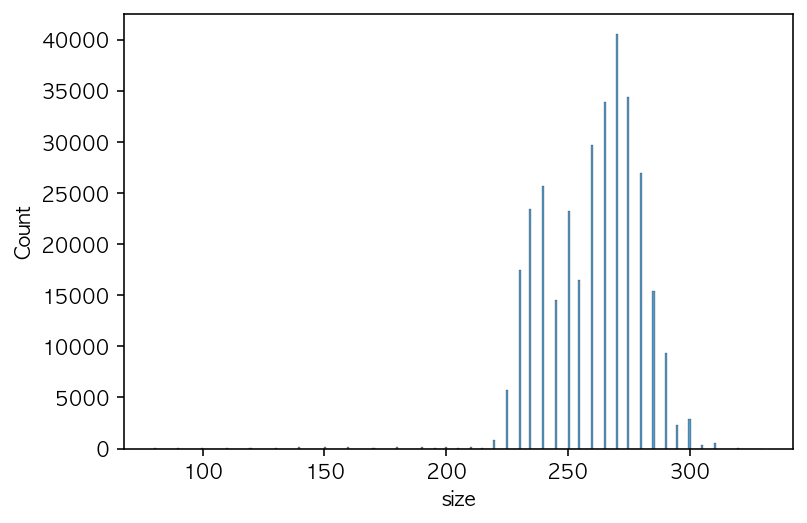

In [409]:
sns.histplot(df['size'])

### color
- color1, color2, color3, color4 추가
- color_count 추가
- multicolor 컬럼 추가
- 색상은 price가 아닌 transactions와 연관이 있어보임.

In [410]:
df['color_count'] = df['color'].apply(lambda x : len(x.split('/')))

In [411]:
df['color_count'].value_counts()

2    204032
3     97726
4     21707
1      1762
Name: color_count, dtype: int64

In [412]:
pd.pivot_table(df, index='color_count', values='price', aggfunc='mean')

,price
color_count,
1,195404
2,330207
3,320850
4,388028


In [413]:
# 트리플 화이트 = 단색
# df[df['color'] == 'WHITE/WHITE/WHITE']

In [414]:
# df[df['color'] == 'BLACK/WHITE-RED-BLUE']

In [415]:
# df[df['color'] == 'WHITE/MULTI-COLOR/WHITE']

In [416]:
# multicolor가 아닌 것은 가격대가 낮다
df.loc[df['color_count']==1, 'multicolor'] = False
df.loc[df['color_count']!=1, 'multicolor'] = True
df.loc[df['color'] == 'WHITE/WHITE/WHITE', 'multicolor'] = False

In [417]:
df['multicolor'].value_counts()

True     319771
False      5456
Name: multicolor, dtype: int64

In [418]:
pd.pivot_table(df, index='multicolor', values='price', aggfunc='median')

,price
multicolor,
False,163000
True,232000


In [419]:
df[df['color_count']==3]['color'].value_counts().head(50)

STARFISH/WHITE/BLACK                    11109
HYPERROYAL/LIGHTSMOKEGREY/WHITE         10250
SAIL/BLACK/MILITARYBLUE                  6050
WHITE/WOLFGREY/ALUMINUM                  6000
BLACK/WHITE/BLACK                        4209
WHITE/WHITE/WHITE                        3694
WHITE/UNIVERSITYBLUE/BLACK               3500
WHITE/DARKPOWDERBLUE/OBSIDIAN            3310
BLACK/HYPERROYAL/WHITE                   3074
LIGHTSMOKEGREY/GYMRED/WHITE              3030
BLACK/WHITE-PINEGREEN/GYMREDORANGE       2950
SEAFOAM/HEALINGORANGE/WHITE              2850
WHITE/HYPERROYAL/WHITE                   2276
WHITE/RACERBLUE/BLACK                    2233
BLACK/PARTICLEGREY/WHITE                 2014
WHITE/BLACK/ISLANDGREEN                  1581
WHITE/BLACK/GYMRED                       1500
WHITE/LIGHTBONE/BLACK                    1450
STORMBLUE/WHITE/BLACK                    1450
SIGNALBLUE/WHITE/BLACK                   1450
WHITE/BLACK/UNIVERSITYBLUE               1450
BLACK/SIRENRED/WHITE              

In [420]:
df[['product','color']].value_counts().head(10)

product                                                           color                            
Jordan 1 Retro High OG Hyper Royal                                HYPERROYAL/LIGHTSMOKEGREY/WHITE      7300
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue  SAIL/BLACK/MILITARYBLUE              6050
(W) Jordan 1 Low White Wolf Grey                                  WHITE/WOLFGREY/ALUMINUM              6000
Jordan 1 Mid Gym Red Black White                                  WHITE/GYMRED-BLACK                   5950
Jordan 1 Low OG Starfish                                          STARFISH/WHITE/BLACK                 5950
(W) Jordan 1 Mid Grey Fog                                         GREYFOG/BLACK-WHITE                  5900
Jordan 1 Retro High OG Shadow 2.0                                 BLACK/LIGHTSMOKEGREY-WHITE           5900
(W) Jordan 1 Mid Wolf Grey                                        WHITE/ALUMINUM-WOLFGREY              5850
Jordan 1 Mid Bred Banned 2020       

In [421]:
def color_slash(x):
    if x.count('/') == 0:
        return x + '///'
    elif x.count('/') == 1:
        return x + '//'
    elif x.count('/') == 2:
        return x + '/'
    elif x.count('/') == 3:
        return x

In [422]:
df['color_list'] = df['color'].apply(color_slash).apply(lambda x : x.split('/'))

In [423]:
df.head(3)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color_list
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,"[LIGHTFUSIONRED, WHITE-LASERORANGE-BLACK, , ]"
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,"[LIGHTFUSIONRED, WHITE-LASERORANGE-BLACK, , ]"
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,"[LIGHTFUSIONRED, WHITE-LASERORANGE-BLACK, , ]"


In [424]:
df['color_list'].apply(lambda x: len(x)).value_counts()

4    325227
Name: color_list, dtype: int64

In [425]:
df['color1'] = df['color_list'].apply(lambda x : x[0])
df['color2'] = df['color_list'].apply(lambda x : x[1])
df['color3'] = df['color_list'].apply(lambda x : x[2])
df['color4'] = df['color_list'].apply(lambda x : x[3])

In [426]:
df = df.drop(['color_list'], axis=1)

### Collabo
- Collabo 컬럼 생성
- Collabo_brand 컬럼 생성
- Collabo_class 컬럼 생성

In [427]:
df['product'].value_counts()

Jordan 1 Retro High OG Hyper Royal                                  7300
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue    6050
(W) Jordan 1 Low White Wolf Grey                                    6000
Jordan 1 Mid Gym Red Black White                                    5950
Jordan 1 Low OG Starfish                                            5950
                                                                    ... 
(GS) Jordan 1 Mid SE Siempre Familia                                   3
(GS) Jordan 1 Mid SE USA Olympic                                       3
(W) Jordan 1 Sage XX Off White                                         2
(W) Jordan 1 Acclimate Black                                           1
(PS) Jordan 1 Mid University Gold                                      1
Name: product, Length: 359, dtype: int64

In [428]:
df['Collabo'] = df['product'].str.contains(' x ', regex=False)

In [429]:
df['Collabo'].value_counts()

False    301048
True      24179
Name: Collabo, dtype: int64

In [430]:
pd.set_option('display.float_format','{:.0f}'.format)

In [431]:
pd.pivot_table(df[df['Collabo']==True], index=['product'], values='price', aggfunc='mean').sort_values(by='price', ascending=False)

,price
product,
Jordan 1 x Dior High OG,11300679
Jordan 1 x Dior Low OG,7222354
Jordan 1 x Off-White Retro High Chicago The Ten,6707644
Jordan 1 x Trophy Room Retro High OG SP Chicago (Friends & Family),4132846
Jordan 1 x Travis Scott x Fragment Retro High OG SP Military Blue,3919802
Jordan 1 x Trophy Room Retro High OG SP Chicago,3394463
Jordan 1 x Union Retro High Blue Toe,2086721
Jordan 1 x Union Retro High Black Toe,2068143
Jordan 1 x Travis Scott Retro High OG SP Mocha,2022153


In [432]:
df.loc[df['Collabo'] ,['product','Collabo']].value_counts()

product                                                             Collabo
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue    True       6050
Jordan 1 x J Balvin Retro High OG                                   True       2950
Jordan 1 x Travis Scott Retro High OG SP Mocha                      True       2900
Jordan 1 x League of Legends Zoom Air CMFT Esports                  True       2535
Jordan 1 x Travis Scott Retro Low OG SP Mocha                       True       1793
Jordan 1 x A Ma Maniere Retro High OG SP Sail and Burgundy          True       1450
Jordan 1 x Paris Saint-Germain Zoom Air CMFT                        True       1400
Jordan 1 x Travis Scott x Fragment Retro High OG SP Military Blue   True        834
Jordan 1 x Union Retro High Black Toe                               True        719
Jordan 1 x Union Retro High Blue Toe                                True        505
Jordan 1 x SoleFly Retro Low OG SP Black and Sport Red              True        500


In [433]:
# df.loc[df['Collabo']==True, 'product'][6162].find('SB') != -1

In [434]:
def extract_collabo(x):
    if x.find('Retro') != -1:
        r1 = x.find('Jordan 1')
        r2 = x.find('Retro')
        return x[r1+11:r2-1]
    elif x.find('Retro') == -1:
        if x.find('High') != -1:
            r1 = x.find('Jordan 1')
            r2 = x.find('High')
            return x[r1+11:r2-1]
        elif x.find('Mid') != -1:
            r1 = x.find('Jordan 1')
            r2 = x.find('Mid')
            return x[r1+11:r2-1]
        elif x.find('Low') != -1:
            r1 = x.find('Jordan 1')
            r2 = x.find('Low')
            return x[r1+11:r2-1]
        elif x.find('Zoom') != -1:
            r1 = x.find('Jordan 1')
            r2 = x.find('Zoom')
            return x[r1+11:r2-1]
        elif x.find('KO') != -1:
            r1 = x.find('Jordan 1')
            r2 = x.find('KO')
            return x[r1+11:r2-1]

In [435]:
df.loc[df['Collabo']==True, 'product'].apply(extract_collabo).value_counts()

Travis Scott x Fragment         6884
Travis Scott                    4693
J Balvin                        2950
League of Legends               2535
A Ma Maniere                    1850
Paris Saint-Germain             1431
Union                           1224
SoleFly                          500
Off-White                        492
Dior                             408
Aleali May                       335
Billie Eilish                    335
Trophy Room                      162
Clot                             152
Lance Mountain                   120
Blue The Great                    69
Ghetto Gastro                     24
Melody Ehsani                     10
Comme des Garcons Homme Plus       5
Name: product, dtype: int64

In [436]:
df['Collabo_brand'] = df.loc[df['Collabo']==True, 'product'].apply(extract_collabo)

In [437]:
df.loc[df['Collabo']==True, ['product', 'Collabo_brand']].value_counts()

product                                                             Collabo_brand               
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue    Travis Scott x Fragment         6050
Jordan 1 x J Balvin Retro High OG                                   J Balvin                        2950
Jordan 1 x Travis Scott Retro High OG SP Mocha                      Travis Scott                    2900
Jordan 1 x League of Legends Zoom Air CMFT Esports                  League of Legends               2535
Jordan 1 x Travis Scott Retro Low OG SP Mocha                       Travis Scott                    1793
Jordan 1 x A Ma Maniere Retro High OG SP Sail and Burgundy          A Ma Maniere                    1450
Jordan 1 x Paris Saint-Germain Zoom Air CMFT                        Paris Saint-Germain             1400
Jordan 1 x Travis Scott x Fragment Retro High OG SP Military Blue   Travis Scott x Fragment          834
Jordan 1 x Union Retro High Black Toe                          

In [438]:
df.loc[df['Collabo']==False, 'Collabo_brand'] = 'None'

In [439]:
df[df['Collabo_brand'].isnull()][['product', 'Collabo']].value_counts()

Series([], dtype: int64)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325227 entries, 0 to 325226
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   size           325227 non-null  int64  
 1   price          325227 non-null  int64  
 2   date           325227 non-null  object 
 3   product        325227 non-null  object 
 4   release_date   325227 non-null  object 
 5   color          325227 non-null  object 
 6   release_price  325227 non-null  int64  
 7   type           325227 non-null  object 
 8   brand          325227 non-null  object 
 9   category       325227 non-null  object 
 10  number         325227 non-null  int64  
 11  wish           325227 non-null  int64  
 12  review         325227 non-null  int64  
 13  transactions   325227 non-null  int64  
 14  review_log     325227 non-null  float64
 15  wish_log       325227 non-null  float64
 16  size_target    325227 non-null  object 
 17  size_type      325227 non-nul

In [441]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['product']

In [442]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand'] = 'S.P.O.T. x Lance Mountain'

In [443]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand']

In [444]:
df.groupby('Collabo_brand')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
Collabo_brand,,
Ghetto Gastro,149792,24
Billie Eilish,190499,335
Aleali May,202412,335
League of Legends,246942,2535
None,248340,301048
Lance Mountain,249942,120
SoleFly,275784,500
Blue The Great,287478,69
Paris Saint-Germain,368780,1431


In [445]:
df.loc[df['Collabo_brand'] == 'Off-White'].groupby('product')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
product,,
Jordan 1 x Off-White Retro High University Blue,1977752,447
Jordan 1 x Off-White Retro High Chicago The Ten,6707644,45


In [446]:
# # 브랜드 카테고리 분류 (기준을 정확히 잡아야 함)
# def make_class(x):
#     if x in ['NBA', 'Quartersnacks', 'Parra']:
#         return 'Normal'
#     elif x in ['Off-White', 'Kasina']:
#         return 'Preminum'
#     elif x in ['Frame Skate', 'StrangeLove', 'Supreme', 'Travis Scott']:
#         return 'Highend'
#     else:
#         return 'None'

In [447]:
# df.loc[df['Collabo_brand'].apply(make_class) == 'Normal', 'Collabo_class'] = 'Normal'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Preminum', 'Collabo_class'] = 'Preminum'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Highend', 'Collabo_class'] = 'Highend'
# df.loc[df['Collabo_brand'].apply(make_class) == 'None', 'Collabo_class'] = 'None'

In [448]:
# df[['product','Collabo_brand', 'Collabo_class']].value_counts()

### date
- after_day 컬럼 생성
- date, release_date : unix 타임스탬프 형식으로 변환

In [449]:
df['date']

0         2021-06-08
1         2021-06-08
2         2021-06-08
3         2021-06-08
4         2021-06-09
             ...    
325222    2021-12-20
325223    2021-12-24
325224    2021-12-26
325225    2021-12-26
325226    2022-01-01
Name: date, Length: 325227, dtype: object

In [450]:
df['date'] = pd.to_datetime(df['date'])
df['release_date'] = pd.to_datetime(df['release_date'])

In [451]:
print(df.shape)
df.head()

(325227, 26)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None
3,270,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None
4,260,349000,2021-06-09,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None


In [452]:
df['after_day'] = df['date'] - df['release_date']

In [453]:
df['after_day'] = df['after_day'].dt.days

In [454]:
df

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day
0,300,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,-4
1,285,239000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,-4
2,280,260000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,-4
3,270,250000,2021-06-08,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,-4
4,260,349000,2021-06-09,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325222,235,239000,2021-12-20,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,,,False,None,153
325223,235,245000,2021-12-24,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,,,False,None,157
325224,280,289000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,,,False,None,159
325225,250,235000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,,,False,None,159


In [455]:
# after_day >= 0 만 선택
df = df[df['after_day'] >= 1]

<AxesSubplot:xlabel='after_day', ylabel='Count'>

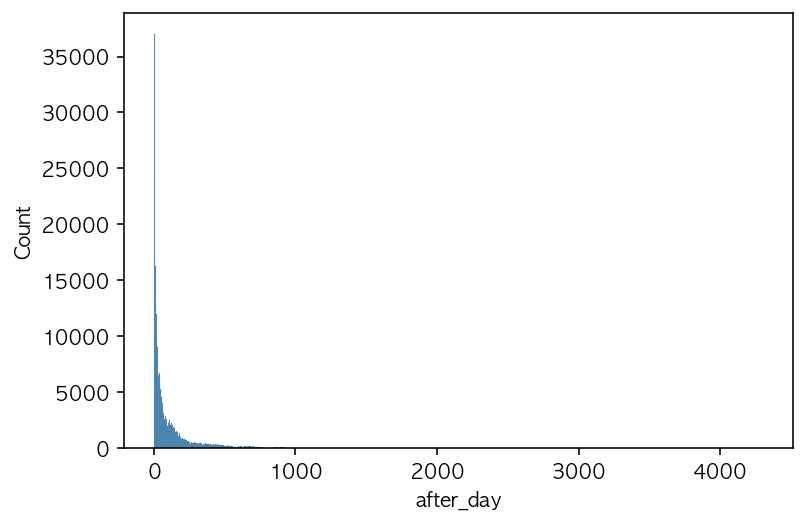

In [456]:
sns.histplot(df['after_day'])

<AxesSubplot:xlabel='after_day', ylabel='Count'>

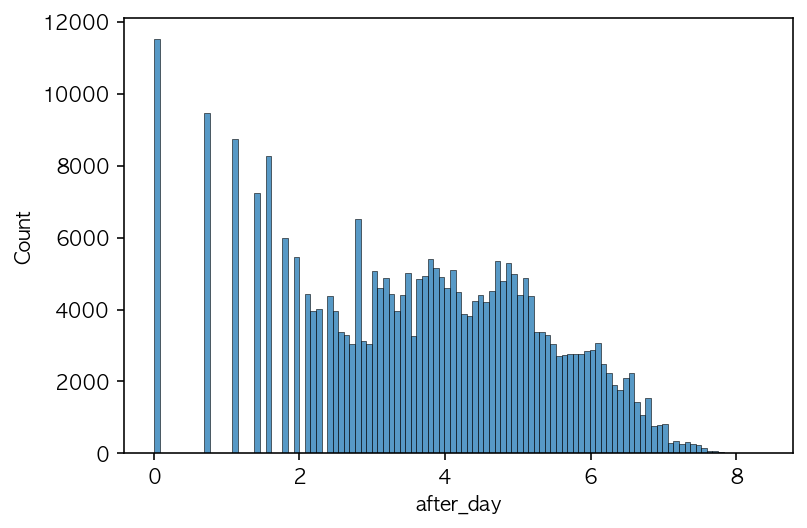

In [457]:
sns.histplot(np.log(df['after_day']+0.000001))

In [458]:
df['after_day_log'] = np.log(df['after_day'] + 0.000001)

In [459]:
df[df['after_day'] == 0].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

Series([], Name: price, dtype: int64)

In [460]:
df[df['after_day'] == 1].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

product
Jordan 1 x Dior Low OG                                              13500000
Jordan 1 x Travis Scott x Fragment Retro High OG SP Military Blue    3137500
Jordan 1 x Travis Scott x Fragment Retro Low OG SP Military Blue     1736517
Jordan 1 High 85 Neutral Grey                                         611636
Jordan 1 x A Ma Maniere Retro High OG SP Sail and Burgundy            497439
Name: price, dtype: float64

In [461]:
import datetime as dt
# 유닉스 타임스탬프로 바꾸기
df['date_unix'] = df['date'].map(dt.datetime.toordinal)
df['release_date_unix'] = df['release_date'].map(dt.datetime.toordinal)

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290906 entries, 522 to 325226
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   size               290906 non-null  int64         
 1   price              290906 non-null  int64         
 2   date               290906 non-null  datetime64[ns]
 3   product            290906 non-null  object        
 4   release_date       290906 non-null  datetime64[ns]
 5   color              290906 non-null  object        
 6   release_price      290906 non-null  int64         
 7   type               290906 non-null  object        
 8   brand              290906 non-null  object        
 9   category           290906 non-null  object        
 10  number             290906 non-null  int64         
 11  wish               290906 non-null  int64         
 12  review             290906 non-null  int64         
 13  transactions       290906 non-null  int64 

### Correlation

In [463]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
522,250,202000,2021-06-13,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,1,0,737954,737953


In [464]:
heatmap_data = df[["price", "size", "date_unix", "release_date_unix", "release_price", "wish", "review", "transactions", 'after_day', 'Collabo', 'color_count', 'multicolor', 'review_log', 'wish_log', 'after_day_log']]

<AxesSubplot:title={'center':'Person Correlation of Features'}>

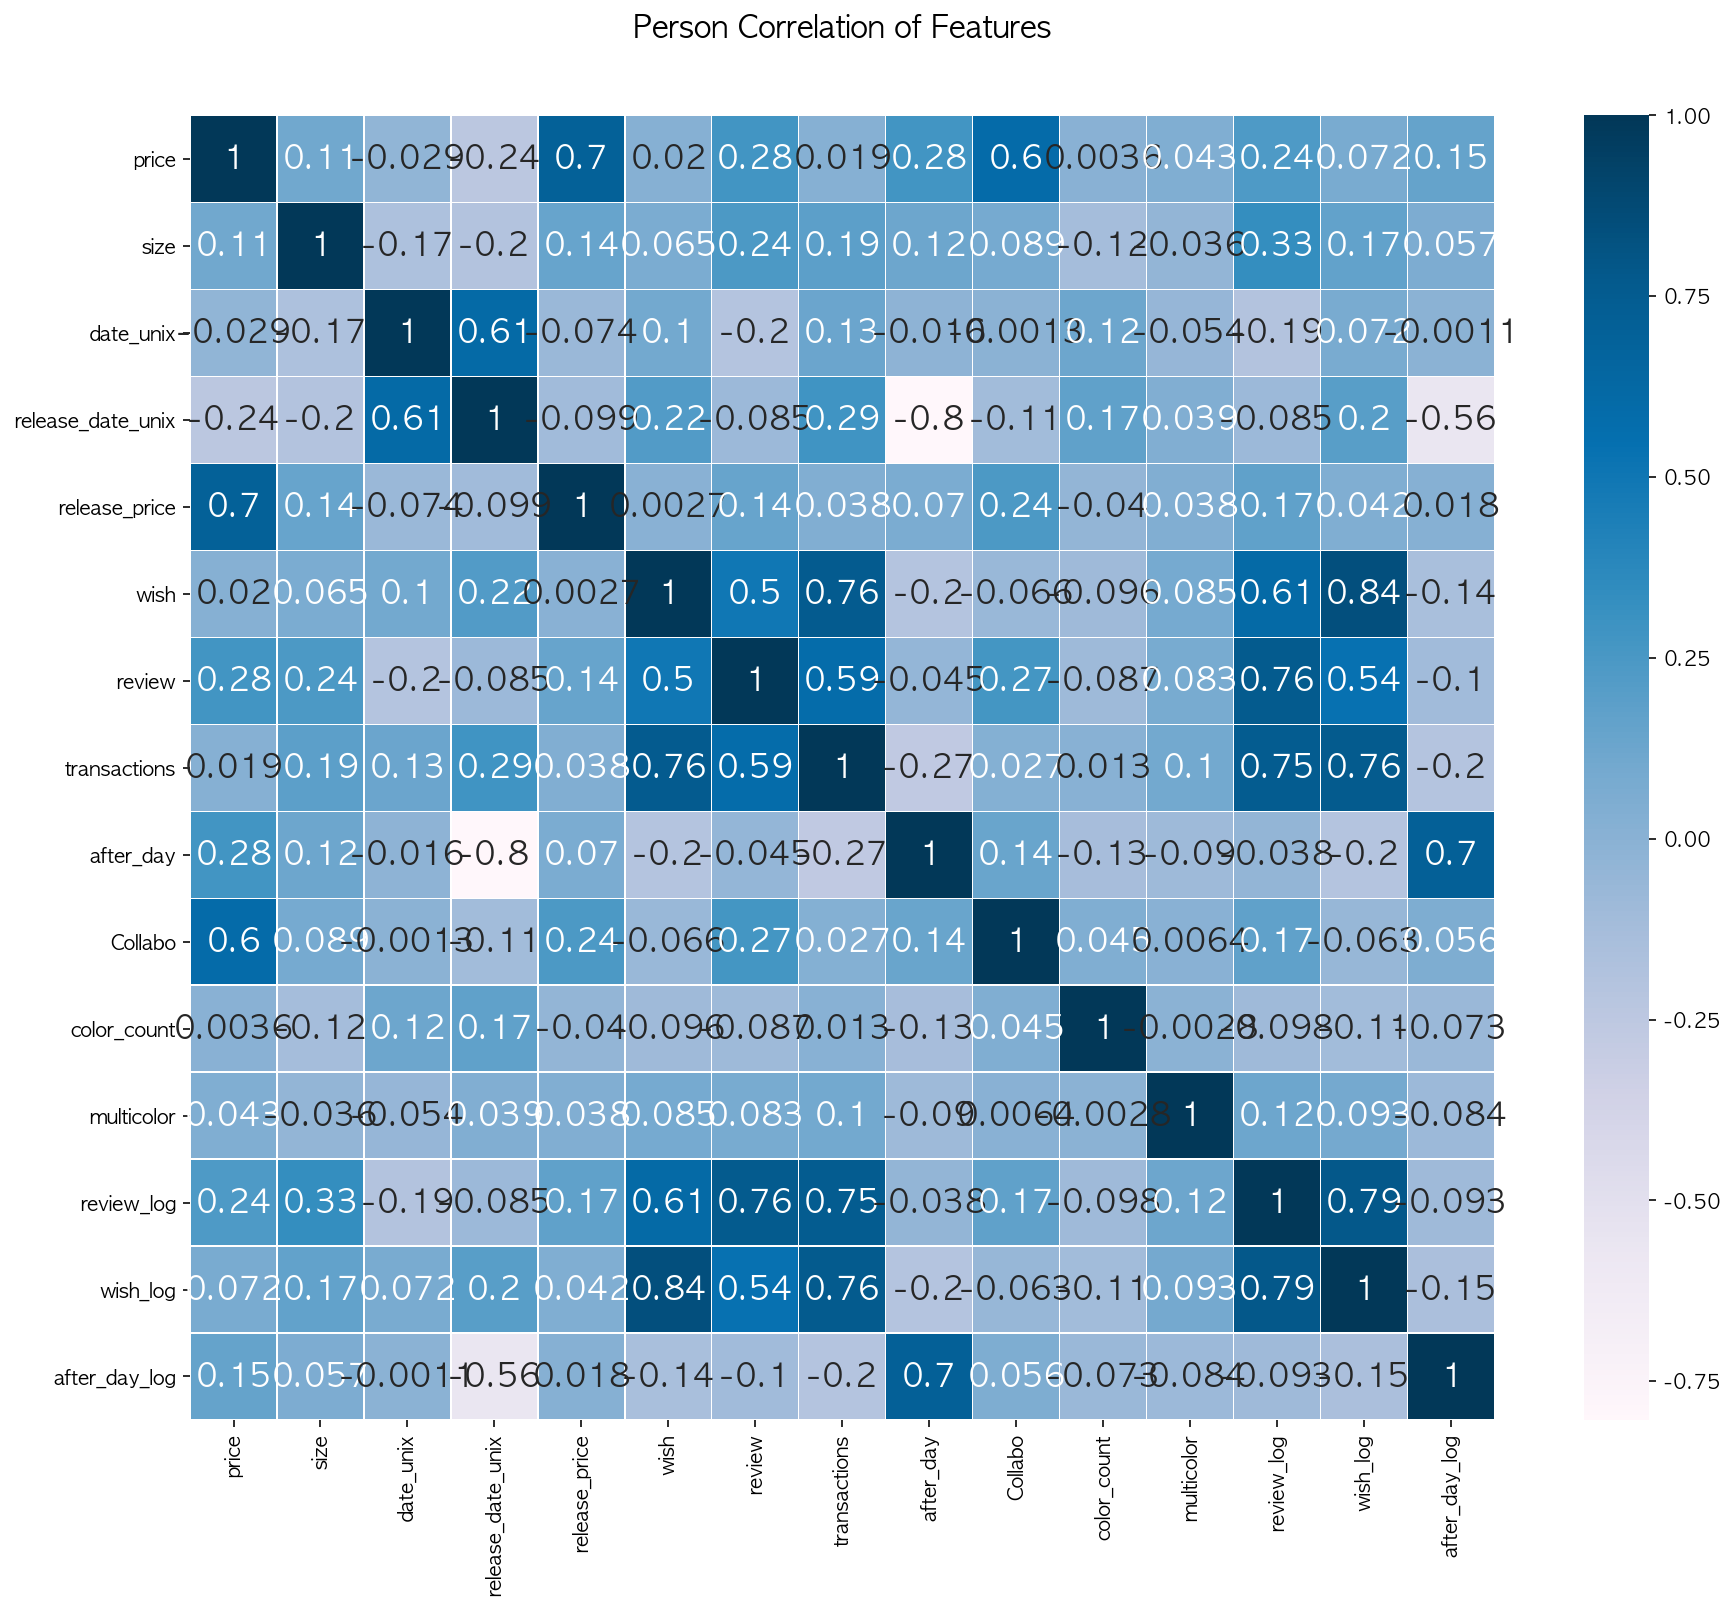

In [465]:
colormap = plt.cm.PuBu
plt.figure(figsize=(16, 12))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0
            , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

#### price (Target)

<AxesSubplot:xlabel='price', ylabel='Count'>

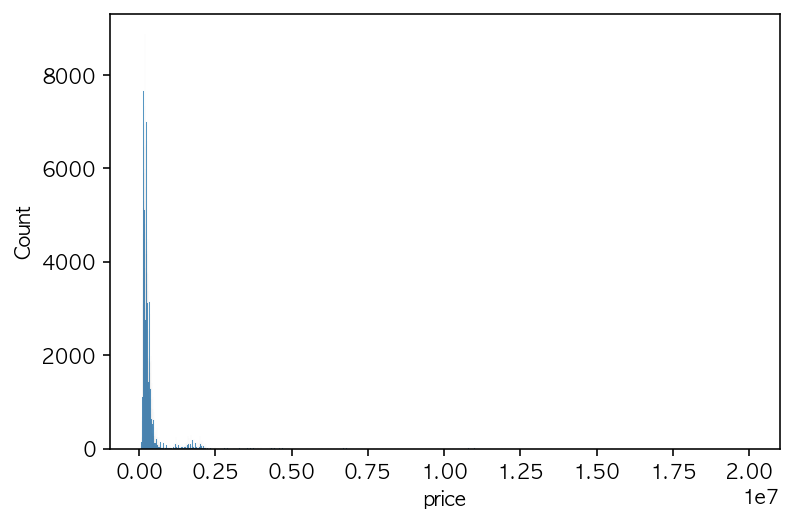

In [466]:
sns.histplot(df['price'])

In [467]:
df.describe()

,size,price,release_price,number,wish,review,transactions,review_log,wish_log,color_count,after_day,after_day_log,date_unix,release_date_unix
count,290906,290906,290906,290906,290906,290906,290906,290906,290906,290906,290906,290906,290906,290906
mean,260,332277,160250,31020,8844,647,2587,6,9,2,131,4,737913,737782
std,19,512998,106445,7374,8660,905,1996,1,1,1,227,2,170,286
min,80,39000,59000,2038,18,0,1,-14,3,1,1,0,737455,733859
25%,245,171000,129000,25598,2852,97,1054,5,8,2,11,2,737792,737673
50%,265,229000,139000,29188,5749,323,1812,6,9,2,43,4,737934,737841
75%,275,309000,199000,37241,13000,834,4200,7,9,3,142,5,738052,737977
max,330,20000000,3000000,47257,43000,4950,7300,9,11,4,4299,8,738162,738153


<AxesSubplot:xlabel='price', ylabel='Count'>

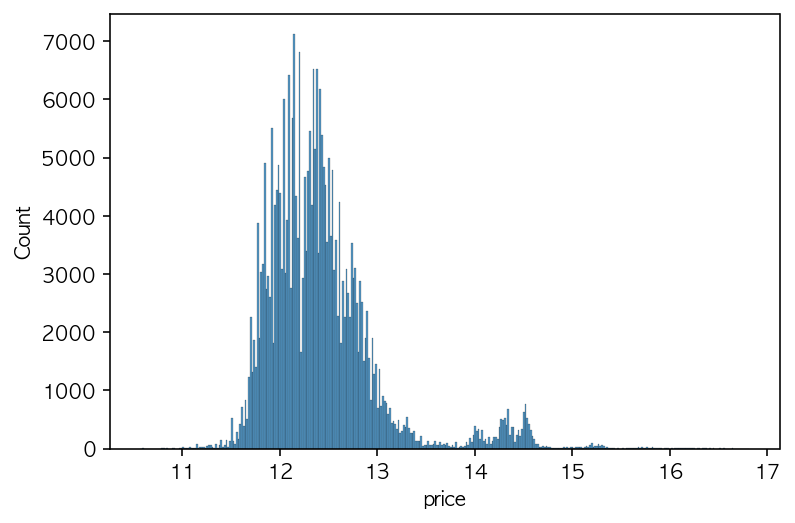

In [468]:
sns.histplot(np.log(df['price']+0.000001))

In [472]:
df = df.reset_index(drop=True)

In [473]:
df.to_csv('data/jordan_1(model).csv')

In [474]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,250,202000,2021-06-13,Jordan 1 Retro High OG Light Fusion Red,2021-06-12,LIGHTFUSIONRED/WHITE-LASERORANGE-BLACK,199000,High,Jordan,Jordan 1,35701,3614,443,1450,6,8,Male,M,2,True,LIGHTFUSIONRED,WHITE-LASERORANGE-BLACK,,,False,None,1,0,737954,737953


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290906 entries, 522 to 325226
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   size               290906 non-null  int64         
 1   price              290906 non-null  int64         
 2   date               290906 non-null  datetime64[ns]
 3   product            290906 non-null  object        
 4   release_date       290906 non-null  datetime64[ns]
 5   color              290906 non-null  object        
 6   release_price      290906 non-null  int64         
 7   type               290906 non-null  object        
 8   brand              290906 non-null  object        
 9   category           290906 non-null  object        
 10  number             290906 non-null  int64         
 11  wish               290906 non-null  int64         
 12  review             290906 non-null  int64         
 13  transactions       290906 non-null  int64 

### Drop Duplicates
- 중복 제거 하지 않는 것이 성능이 더 높음.

In [ ]:
# df = df.drop_duplicates().reset_index(drop=True)

In [229]:
print(df.shape)

(290906, 30)


## Preprocessing for Modeling

In [671]:
dataset = pd.get_dummies(df, columns = ['size_target', 'multicolor', 'Collabo_class'])

In [672]:
print(dataset.shape)
dataset.head()

(158192, 33)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,size_target_Female,size_target_Kids,size_target_Male,multicolor_False,multicolor_True,Collabo_class_Highend,Collabo_class_None,Collabo_class_Normal,Collabo_class_Preminum
16,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
17,250,119000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
18,235,124000,738108,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,7,1,0,0,0,1,0,1,0,0
19,255,149000,738112,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,11,1,0,0,0,1,0,1,0,0
20,240,120000,738118,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,17,1,0,0,0,1,0,1,0,0


In [673]:
dataset.loc[dataset['Collabo'] == True, 'Collabo'] = 1
dataset.loc[dataset['Collabo'] == False, 'Collabo'] = 0

In [680]:
pd.set_option('display.float_format','{:.2f}'.format)
corr = dataset.corr()['price'].sort_values(ascending=False)

In [688]:
corr

price                     1.00
Collabo_class_Highend     0.66
release_price             0.46
Collabo_class_Preminum    0.45
size_target_Male          0.35
after_day                 0.29
size                      0.28
review_log                0.25
review                    0.11
multicolor_True           0.10
wish_log                  0.05
wish                      0.00
transactions              0.00
Collabo_class_Normal     -0.03
color_count              -0.10
multicolor_False         -0.10
size_target_Kids         -0.19
size_target_Female       -0.27
date                     -0.28
number                   -0.35
release_date             -0.44
Collabo_class_None       -0.60
Name: price, dtype: float64

In [687]:
columns = corr[:11].index

In [721]:
y_label = dataset['price']
# x_data = dataset.drop(['price', 'date', 'product', 'release_date', 'color', 'brand', 'category', 'number', 'color_count', 'color1', 'color2', 'color3', 'color4', 'Collabo', 'Collabo_brand', 'multicolor_True', 'multicolor_False'], axis=1)
x_data = dataset[columns].drop(['price','review'], axis=1)

In [722]:
print(x_data.shape)
x_data.head()

(158192, 9)


,Collabo_class_Highend,release_price,Collabo_class_Preminum,size_target_Male,after_day,size,review_log,multicolor_True,wish_log
16,0,129000,0,0,0,235,1.39,1,4.53
17,0,129000,0,0,0,250,1.39,1,4.53
18,0,129000,0,0,7,235,1.39,1,4.53
19,0,129000,0,0,11,255,1.39,1,4.53
20,0,129000,0,0,17,240,1.39,1,4.53


In [723]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [724]:
x_columns = x_data.columns

In [725]:
x_data = scaler.fit_transform(x_data)

In [726]:
print(x_data.shape)
x_data

(158192, 9)


array([[0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       ...,
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687]])

In [727]:
y_label = y_label.values.reshape(-1,1)

In [728]:
print(y_label.shape)
y_label

(158192, 1)


array([[125000],
       [119000],
       [124000],
       ...,
       [269000],
       [270000],
       [210000]])

In [729]:
# x_data.to_csv('data/X_data.csv', index=False)
# y_label.to_csv('data/y_label.csv', index=False)

In [730]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, train_size=0.8, random_state=45)

In [731]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(110734, 9) (47458, 9) (110734, 1) (47458, 1)


In [1056]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, train_size=0.7, random_state=45)

## Model Selection

- RandomForestRegressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- XGBRegressor : https://xgboost.readthedocs.io/en/stable/python/python_api.html
- LGBMRegressor
- CatBoostRegressor : https://catboost.ai/en/docs/concepts/python-reference_train

### 1. RandomForest

In [1057]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

In [1058]:
rfr = RandomForestRegressor()
# xgbr = XGBRegressor()
# lgbmr = LGBMRegressor()
# catr = CatBoostRegressor()
# # xgbr = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
# #                            colsample_bytree=1, max_depth=7)

In [1059]:
rfr.fit(X_train_val, y_train_val)
# xgbr.fit(X_train,y_train)
# lgbmr.fit(X_train, y_train)
# catr.fit(X_train, y_train)

RandomForestRegressor()

In [1060]:
from sklearn.metrics import mean_squared_error

rfr_pred = rfr.predict(X_test_val)
# xgbr_pred = xgbr.predict(X_test)
# lgbmr_pred = lgbmr.predict(X_test)
# catr_pred = catr.predict(X_test)

rfr_mse = mean_squared_error(y_test_val, rfr_pred)
# xgbr_mse = mean_squared_error(y_test, xgbr_pred)
# lgbmr_mse = mean_squared_error(y_test, lgbmr_pred)
# catr_mse = mean_squared_error(y_test, catr_pred)

rfr_rmse = np.sqrt(rfr_mse)
# xgbr_rmse = np.sqrt(xgbr_mse)
# lgbmr_rmse = np.sqrt(lgbmr_mse)
# catr_rmse = np.sqrt(catr_mse)

print(rfr_rmse)
# print(rfr_rmse, xgbr_rmse, lgbmr_rmse, catr_rmse)

21883.895708897653


In [1061]:
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(rfr_rmse)

21349.057169470372


In [1062]:
from sklearn.metrics import r2_score
r2_score(y_test, rfr_pred)

0.993887076143271

In [1064]:
print(1 - (1-rfr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

0.9968441158591359


In [737]:
X_train = pd.DataFrame(data = X_train, columns = x_columns)
y_train = pd.DataFrame(data = y_train, columns = ['price'])

In [738]:
index=rfr.feature_importances_.argsort()[::-1][0:-1]
index_imp=rfr.feature_importances_[index]
index_name=X_train.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

[('Collabo_class_Highend', 0.43398807733088735),
 ('Collabo_class_Preminum', 0.22939922641153962),
 ('review_log', 0.1324248508376564),
 ('release_price', 0.0647071670333954),
 ('after_day', 0.05577575553866152),
 ('wish_log', 0.04749870556515516),
 ('size_target_Male', 0.02232827250391282),
 ('size', 0.013563124235918572)]

Feature ranking:
1. feature Collabo_class_Highend (0.434)
2. feature Collabo_class_Preminum (0.229)
3. feature review (0.111)
4. feature release_price (0.059)
5. feature after_day (0.052)
6. feature wish (0.039)
7. feature transactions (0.039)
8. feature size_target_Male (0.022)
9. feature size (0.014)
10. feature Collabo_class_Normal (0.000)
11. feature Collabo_class_None (0.000)
12. feature size_target_Female (0.000)
13. feature size_target_Kids (0.000)


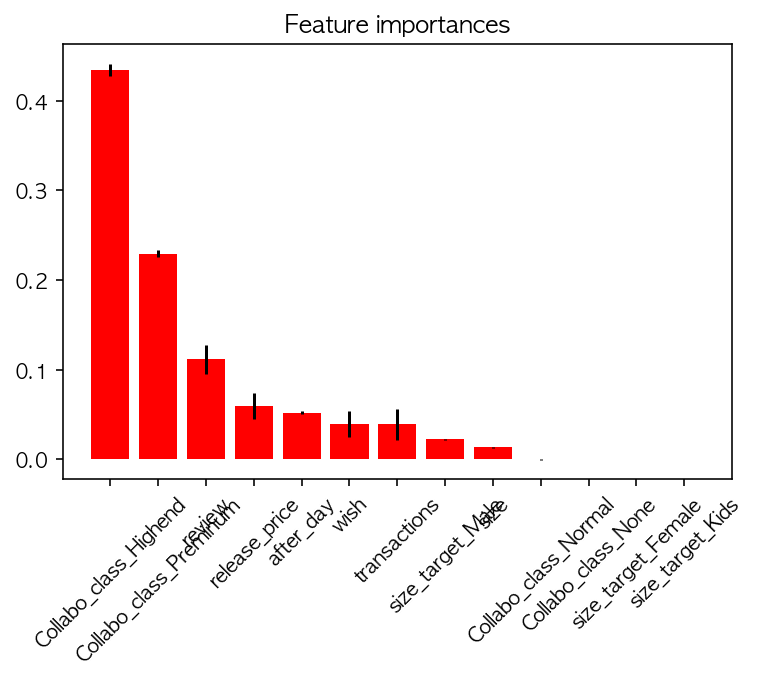

In [427]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [430]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,Collabo_class
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947.00,93.00,4.00,30,Female,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,None


### 2. CatBoost

In [527]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,Collabo_class,after_day
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,None,0


In [ ]:
from catboost import CatBoostRegressor

cat_features = []
X_train = 
y_train

### Featurn Selection
- https://data-newbie.tistory.com/608

In [ ]:
from BorutaShap import BorutaShap, load_data

X, y = load_data(data_type='regression')
X.head()
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(X_size=12, figsize=(19,8),
                      y_scale='log', which_features='all',)

In [ ]:
if self.importance_measure == 'shap':

self.explain()
vals = self.shap_values

if normalize:
vals = self.calculate_Zscore(vals)

X_feature_import = vals[:len(self.X.columns)]
Shadow_feature_import = vals[len(self.X_shadow.columns):]


elif self.importance_measure == 'gini':

feature_importances_ =  np.abs(self.model.feature_importances_)

if normalize:
feature_importances_ = self.calculate_Zscore(feature_importances_)

X_feature_import = feature_importances_[:len(self.X.columns)]
Shadow_feature_import = feature_importances_[len(self.X.columns):]

else:

raise ValueError('No Importance_measure was specified select one of (shap, gini)')

## 하이퍼파라미터 튜닝

In [1357]:
dataset['release_price'].mean()

125574.04103873773

In [1356]:
dataset['price'].median()

280000.0

### 1. Grid Search
- https://www.kaggle.com/jayatou/xgbregressor-with-gridsearchcv

In [1354]:
# RF
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [1359]:
pred = grid_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

46991.65224387363

In [1207]:
# XGB
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgbr = XGBRegressor()
xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_data, y_label)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


KeyboardInterrupt: 

In [1205]:
r_sq = xgbr.score(X_train, y_train)
print(r_sq)

0.9859814866931647


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

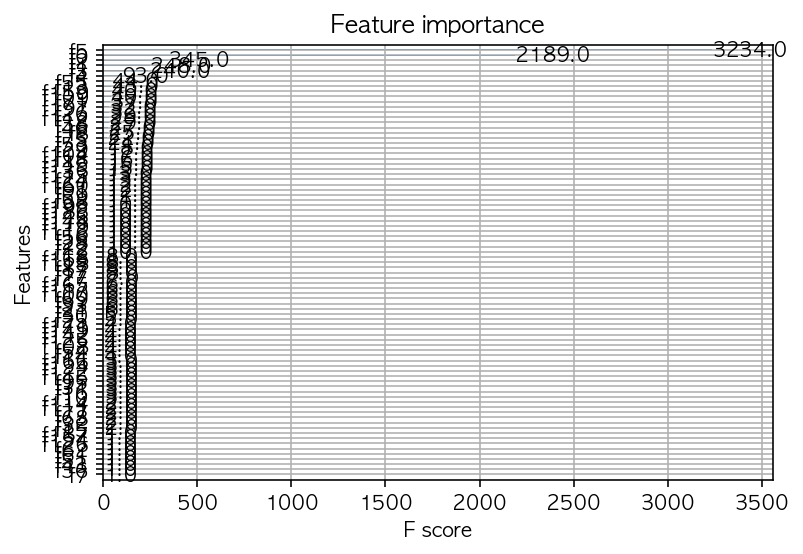

In [1141]:
xgboost.plot_importance(xgbr)

### 2. Optuna 활용
- 출처 : https://www.kaggle.com/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna
- 매우 오래걸리네..

In [ ]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['mse', 'mae'])
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 10000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    
    regr = RandomForestRegressor(bootstrap = bootstrap, criterion = criterion,
                                 max_depth = max_depth, max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2)
    
    
    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)
    
    score = cross_val_score(regr, X_train, y_train, cv=5, scoring="r2")
    r2_mean = score.mean()

    return r2_mean

In [ ]:
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

#Create an instance with tuned hyperparameters
optimised_rf = RandomForestRegressor(bootstrap = study.best_params['bootstrap'], criterion = study.best_params['criterion'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     max_leaf_nodes = study.best_params['max_leaf_nodes'],n_estimators = study.best_params['n_estimators'],
                                     n_jobs=2)
#learn
optimised_rf.fit(X_train ,y_train)

In [1017]:
import optuna

import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1018]:
def objective(trial,data=x_data,target=y_label):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
#         'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [1019]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-01-05 13:37:31,321] A new study created in memory with name: no-name-d85c40ef-64fa-40b2-8fbe-d22405379406


KeyboardInterrupt: 

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [ ]:
# direction : score 값을 최대 또는 최소로 하는 방향으로 지정 
study = optuna.create_study(direction='minimize',sampler=TPESampler())

# n_trials : 시도 횟수 (미 입력시 Key interrupt가 있을 때까지 무한 반복)
study.optimize(lambda trial : objectiveXGB(trial, X,  y, X_test), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

# Console 출력 예)
# Best trial: score 0.6918131483269861,
# params {'n_estimators': 1988, 'max_depth': 15, 'min_child_weight': 171, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.009025835256777458, 'alpha': 1.0684343216052703, 'subsample': 0.6} 

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)

### 3. Random Search

In [ ]:
# Coarse
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다. (loop)
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 "기하평균"을 통해 하나로 합칩니다. (트렌드적인 면모, 비율같은 것이 중요할 때 사용)
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
    # Mean Squared Logarithmic Error(MSLE)를 계산합니다.
    # 이후 여기에 numpy의 sqrt(square root)를 활용하여 루트 연산을 합니다.
    # 이 결과가 사실상 Root Mean Squared Logarithmic Error(RMSLE)가 됩니다.
    # 이를 score라는 이름의 변수에 할당합니다.
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

In [ ]:
# Fine
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
fine_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 40, high = 100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.8, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합칩니다.
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    fine_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# fine_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)

# 변환한 fine_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by="score")

# fine_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(fine_hyperparameters_list.shape)

# fine_hyperparameters_list의 상위 10개를 출력합니다.
fine_hyperparameters_list.head(10)

In [ ]:
# 가장 score가 낮게 나온(=좋은 정확도가 나온) 하이퍼패러미터를 가져옵니다.
# 이를 best_hyperparameters라는 이름의 변수에 저장합니다.
best_hyperparameters = fine_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터만 가져옵니다.
# 이를 best_max_depth라는 이름의 변수에 저장합니다.
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터만 가져옵니다.
# 이를 best_max_features라는 이름의 변수에 저장합니다.
best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력합니다.
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

In [ ]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
# best_max_depth = 97
# best_max_features = 0.897703
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)
model